<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_kaggle_5_moda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from pycaret.classification import *

In [4]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [5]:
df_churn_train_copy = df_churn_train.copy()

In [6]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
df_churn_train.dtypes


id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [8]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [9]:
#dropando 'id
df_churn_train.drop(columns=['id'], inplace=True)
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [10]:
coluna_treino = df_churn_train.columns
coluna_treino

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [11]:
df_churn_train.shape

(5634, 20)

In [12]:
#vendo e contando os elementos de cada coluna
for i in coluna_treino:
    print(df_churn_train[i].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64
0    4740
1     894
Name: seniorcitizen, dtype: int64
No     2902
Yes    2732
Name: partner, dtype: int64
No     3793
Yes    1623
Name: dependents, dtype: int64
1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
71.0    129
7.0     100
5.0      99
70.0     92
8.0      90
6.0      87
10.0     85
12.0     82
9.0      81
13.0     80
68.0     78
11.0     75
17.0     72
67.0     71
22.0     71
15.0     71
18.0     70
69.0     70
24.0     69
23.0     65
56.0     64
35.0     63
25.0     63
52.0     62
26.0     61
14.0     60
66.0     56
62.0     56
16.0     56
64.0     56
30.0     56
41.0     55
63.0     54
27.0     54
47.0     54
19.0     54
65.0     54
29.0     53
46.0     52
54.0     52
51.0     51
60.0     51
53.0     51
43.0     51
49.0     50
50.0     50
32.0     49
20.0     48
55.0     48
58.0     48
21.0     48
38.0     47
45.0     47
40.0     46
42.0     46
34.0     46
37.0     46
28.0     45
31.0     45
61.0     44
48

###tratando o paymentmethod

In [13]:
#contar a variavel 
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [14]:
#preechendo os nan, criterio moda
df_churn_train['paymentmethod'].fillna('Electronic check', inplace=True)

In [15]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1986
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [16]:
df_churn_train.shape

(5634, 20)

In [ ]:
#df_pay.fillna('Electronic check', inplace=True)

In [ ]:
'''
for h in l_index_pay:
    df_pay.drop(index = h, inplace = True)'''
 
    


In [ ]:
#df_churn_train[] = df_churn_train['totalcharges'].str.replace(',', '.')

###tratando o dependents


In [17]:
df_churn_train['dependents'].isna().sum()

218

In [18]:
#contar a variavel 
df_churn_train['dependents'].value_counts()

No     3793
Yes    1623
Name: dependents, dtype: int64

In [19]:
#criterio = moda
df_churn_train['dependents'].fillna('No', inplace=True)

In [20]:
df_churn_train['dependents'].isna().sum()

0

In [21]:
df_churn_train['dependents'].value_counts()

No     4011
Yes    1623
Name: dependents, dtype: int64

###análise tenure

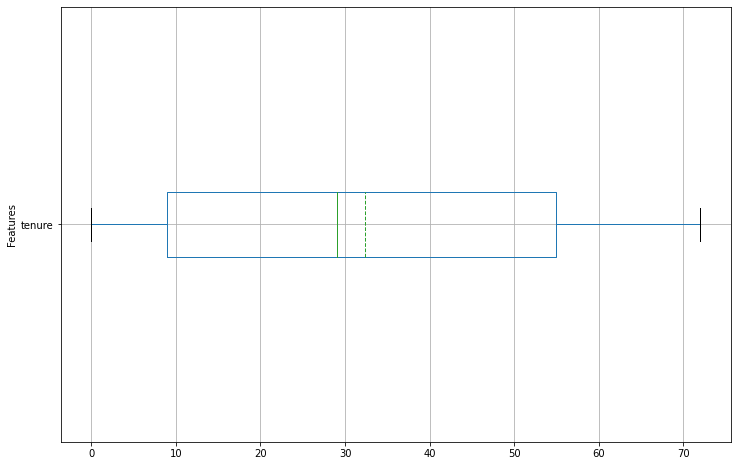

In [22]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [23]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [25]:
df_churn_train['tenure'].value_counts()

1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
71.0    129
7.0     100
5.0      99
70.0     92
8.0      90
6.0      87
10.0     85
12.0     82
9.0      81
13.0     80
68.0     78
11.0     75
17.0     72
67.0     71
22.0     71
15.0     71
18.0     70
69.0     70
24.0     69
23.0     65
56.0     64
35.0     63
25.0     63
52.0     62
26.0     61
14.0     60
66.0     56
62.0     56
16.0     56
64.0     56
30.0     56
41.0     55
63.0     54
27.0     54
47.0     54
19.0     54
65.0     54
29.0     53
46.0     52
54.0     52
51.0     51
60.0     51
53.0     51
43.0     51
49.0     50
50.0     50
32.0     49
20.0     48
55.0     48
58.0     48
21.0     48
38.0     47
45.0     47
40.0     46
42.0     46
34.0     46
37.0     46
28.0     45
31.0     45
61.0     44
48.0     44
59.0     43
57.0     43
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, dtype: int64

In [26]:
df_churn_train[['tenure']].describe()

,tenure
count,5173.000000
mean,32.332882
std,24.463607
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [27]:
df_churn_train['tenure'].mean(), df_churn_train['tenure'].median(), df_churn_train['tenure'].mode()

(32.332882273342356, 29.0, 0    1.0
 dtype: float64)

In [ ]:
#29(53); 9 (81); 55(48), substutir por 27
#mp_q = (9*81+29*53+55*48)/(53+81+48)
#mp_q

26.956043956043956

In [28]:
df_churn_train[df_churn_train['tenure']==55].count()

gender              48
seniorcitizen       48
partner             48
dependents          48
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [29]:
#substituição pela moda = 1.0
df_churn_train['tenure'].fillna(1.0, inplace = True)

In [30]:
df_churn_train[df_churn_train['tenure'].isna()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [31]:
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,29.769081
std,24.965201
min,0.000000
25%,5.000000
50%,24.500000
75%,53.000000
max,72.000000


In [32]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

###totalcharges

In [33]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')

In [34]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.10,0
1,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [35]:
df_churn_train['totalcharges'].value_counts()

20.20      8
19.55      7
19.75      6
19.45      6
19.65      6
          ..
1292.20    1
153.30     1
2659.45    1
2460.55    1
21.00      1
Name: totalcharges, Length: 5285, dtype: int64

In [36]:
df_churn_train[['totalcharges']].isna().sum()

totalcharges    8
dtype: int64

In [37]:
c = list(df_churn_train[df_churn_train['totalcharges'].isna()].index)
c

[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [38]:
df_churn_train['tenure'][161]

0.0

In [39]:
df_churn_train['totalcharges'].mode(), df_churn_train['totalcharges'].mean(), df_churn_train['totalcharges'].median()

(0    20.2
 dtype: float64, 2273.513810878064, 1396.125)

In [40]:
#df_churn_train['monthlycharges'][161] SUBT PELA MODA
for i in c:
    df_churn_train['totalcharges'][i] = 20.2


In [37]:
df_churn_train['totalcharges'][5151]

20.2

###tratando as categoricas

In [41]:
df_churn_train.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_train.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
#df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [42]:
df_churn_train.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_train.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_train.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_train.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_train.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_train.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 



In [43]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [44]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,0,No,56.0,0,3,2,1,1,1,1,0,0,0,0,1,45.05,2560.10,0
1,0,0,1,Yes,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,1,0,1,No,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,1,0,0,No,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,0,0,1,Yes,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [45]:
df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [46]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,0,0,1,45.05,2560.10,0
1,0,0,1,1,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [47]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
#import pandas as pd
#import numpy as np

#####tratando o DF teste

In [48]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/test.csv'
df_churn_test = pd.read_csv(url)
df_churn_test

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8
1405,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3
1406,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5
1407,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3


In [49]:
#Normalizar as colunas
df_churn_test.columns = [col.lower() for col in df_churn_test.columns]
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [50]:
df_churn_test.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
dtype: object

In [51]:
df_churn_test.shape

(1409, 20)

In [52]:
#dropando 'id
df_churn_test.drop(columns=['id'], inplace=True)
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [53]:
df_churn_test.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents           41
tenure              118
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        30
monthlycharges        0
totalcharges          0
dtype: int64

In [54]:
coluna_test = df_churn_test.columns
coluna_test

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [55]:
#vendo e contando os elementos de cada coluna
for i in coluna_test:
    print(df_churn_test[i].value_counts())

Male      706
Female    703
Name: gender, dtype: int64
0    1161
1     248
Name: seniorcitizen, dtype: int64
No     739
Yes    670
Name: partner, dtype: int64
No     953
Yes    415
Name: dependents, dtype: int64
1.0     122
72.0     68
2.0      50
3.0      35
4.0      32
71.0     29
12.0     25
9.0      24
67.0     23
5.0      23
66.0     23
13.0     23
70.0     22
7.0      21
10.0     21
35.0     19
18.0     19
8.0      19
64.0     19
11.0     18
68.0     18
61.0     18
24.0     18
65.0     17
58.0     17
48.0     16
20.0     16
46.0     16
22.0     16
16.0     15
26.0     15
57.0     15
34.0     15
23.0     15
15.0     15
53.0     15
19.0     14
40.0     14
56.0     14
50.0     14
6.0      14
59.0     14
33.0     14
31.0     14
42.0     13
21.0     13
60.0     13
49.0     13
29.0     13
39.0     12
25.0     12
69.0     12
51.0     12
27.0     12
14.0     12
30.0     11
62.0     11
17.0     11
32.0     11
37.0     10
55.0     10
45.0      9
52.0      9
47.0      9
36.0      9
41.0    

###dependents

In [56]:
df_churn_test['dependents'].isna().sum()

41

In [57]:
df_churn_test['dependents'].value_counts()

No     953
Yes    415
Name: dependents, dtype: int64

In [58]:
df_churn_test['dependents'].fillna('No', inplace=True)

In [59]:
df_churn_test['dependents'].isna().sum()

0

###trata o pay

In [60]:
df_churn_test['paymentmethod'].value_counts()

Electronic check             430
Credit card (automatic)      329
Mailed check                 313
Bank transfer (automatic)    307
Name: paymentmethod, dtype: int64

In [61]:
df_churn_test['paymentmethod'].isna().sum()

30

In [62]:
df_churn_test['paymentmethod'].fillna('Electronic check', inplace=True)

In [63]:
df_churn_test['paymentmethod'].isna().sum()

0

##tenure

In [64]:
df_churn_test[['tenure']].isna().sum()

tenure    118
dtype: int64

In [65]:
df_churn_test[['tenure']].describe()

,tenure
count,1291.000000
mean,32.460883
std,24.843710
min,0.000000
25%,9.000000
50%,29.000000
75%,57.000000
max,72.000000


In [66]:
df_churn_test['tenure'].mean(), df_churn_test['tenure'].median(), df_churn_test['tenure'].mode()

(32.46088303640589, 29.0, 0    1.0
 dtype: float64)

In [67]:
#substituição pela moda = 1.0
df_churn_test['tenure'].fillna(1.0, inplace = True)

###totalcharges


In [68]:
df_churn_test['totalcharges'] = df_churn_test['totalcharges'].str.replace(',', '.')
df_churn_test['totalcharges'] = pd.to_numeric(df_churn_test['totalcharges'], errors= 'coerce')

In [69]:
df_churn_test[['totalcharges']].isna().sum()

totalcharges    3
dtype: int64

In [70]:
l_index_charg = list(df_churn_test[df_churn_test['totalcharges'].isna()].index)
l_index_charg

[313, 1063, 1297]

In [71]:
df_churn_test['totalcharges'].mode()

0    19.75
1    20.20
dtype: float64

In [72]:
#df_churn_test['monthlycharges'][313]
for i in l_index_charg:
    df_churn_test['totalcharges'][i] =20.20


In [74]:
df_churn_test.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [73]:
df_churn_test.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_test.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)


In [75]:
df_churn_test.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_test.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_test.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_test.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_test.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_test.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 


In [76]:
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,Yes,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,0,1,1,Yes,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,0,0,0,No,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15
3,1,0,1,Yes,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15
4,1,0,0,No,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70


In [77]:
df_churn_test.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [78]:
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70


In [79]:
df_churn_test.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

###aplicando o MinMaxScaler

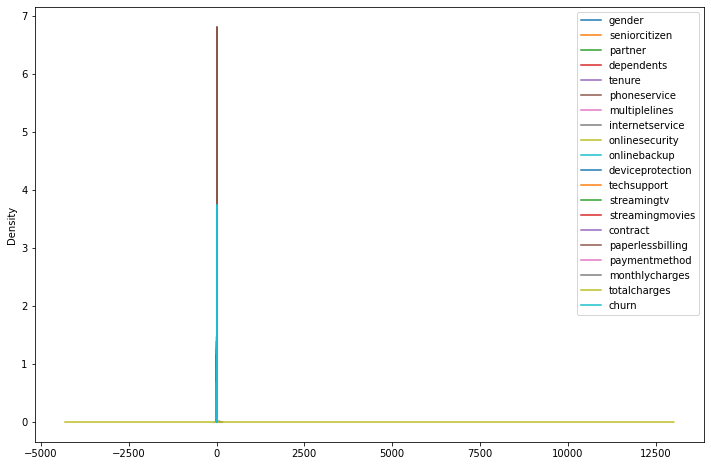

In [80]:
df_churn_train.plot(kind = 'kde', figsize=(12,8))

In [81]:
df_churn_train.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

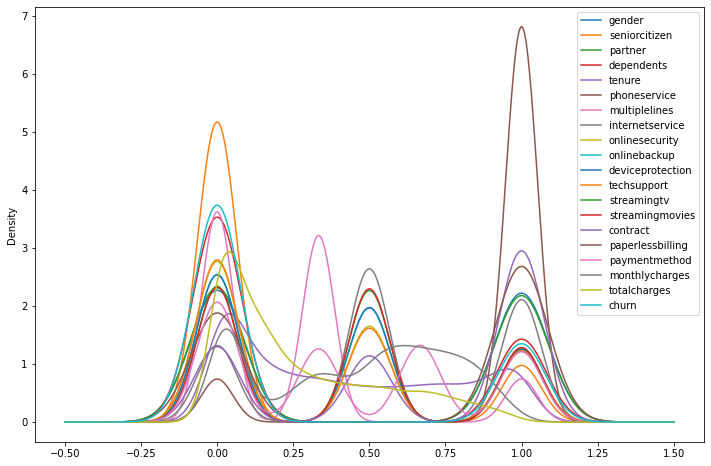

In [82]:
treino_MinMaxScaler = MinMaxScaler().fit_transform(df_churn_train)
df_treino_MinMaxScaler = pd.DataFrame(treino_MinMaxScaler, columns= ['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'])
df_treino_MinMaxScaler.plot(kind = 'kde', figsize=(12,8))

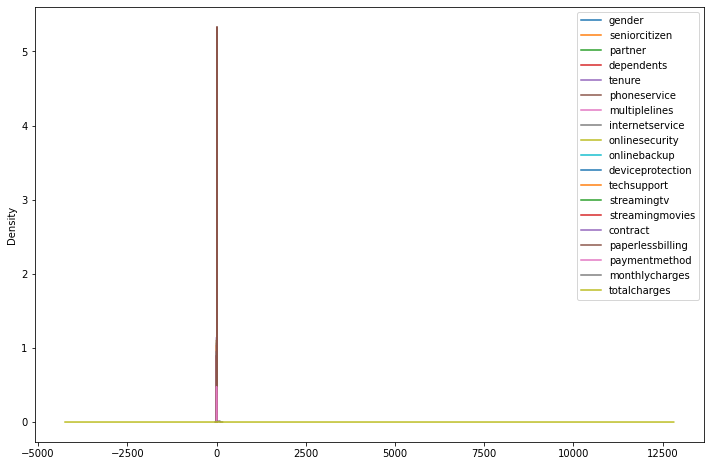

In [83]:
df_churn_test.plot(kind = 'kde', figsize=(12,8))

In [84]:
df_churn_test.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

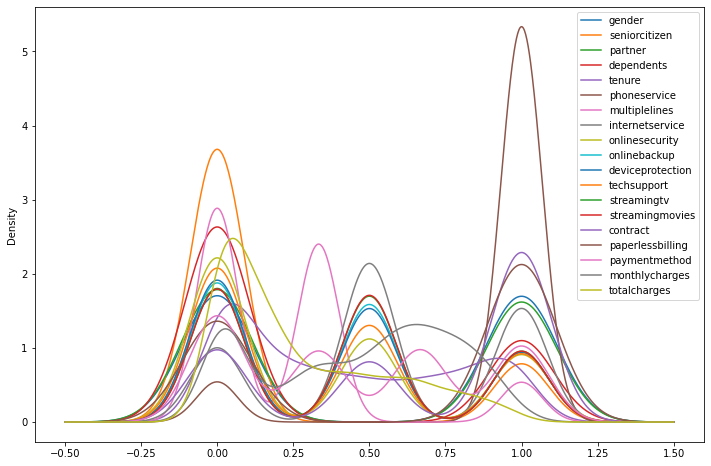

In [85]:
test_MinMaxScaler = MinMaxScaler().fit_transform(df_churn_test)
df_test_MinMaxScaler = pd.DataFrame(test_MinMaxScaler, columns= ['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'])
df_test_MinMaxScaler.plot(kind = 'kde', figsize=(12,8))

###aplicando o autolml

In [ ]:
'''
clf = setup(data = df_churn_train,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
            'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = ['id'], 
            silent = False)'''

In [93]:
clf = setup(data = df_churn_train,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
            'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = [], 
            silent = False)

,Description,Value
0,session_id,6402
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [94]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8123,0.8527,0.7345,0.8055,0.8071,0.4914,0.4947,0.232
gbc,Gradient Boosting Classifier,0.8116,0.8554,0.7315,0.8045,0.8060,0.4876,0.4915,0.552
lr,Logistic Regression,0.8103,0.8491,0.7300,0.8032,0.8048,0.4846,0.4883,0.142
lightgbm,Light Gradient Boosting Machine,0.8098,0.8471,0.7309,0.8026,0.8044,0.4839,0.4871,0.118
ridge,Ridge Classifier,0.8078,0.0000,0.7196,0.7989,0.8003,0.4696,0.4751,0.020
catboost,CatBoost Classifier,0.8055,0.8478,0.7233,0.7975,0.7996,0.4703,0.4738,3.586
lda,Linear Discriminant Analysis,0.8037,0.8451,0.7271,0.7975,0.7994,0.4727,0.4749,0.037
rf,Random Forest Classifier,0.7989,0.8356,0.7089,0.7889,0.7910,0.4448,0.4499,0.705
xgboost,Extreme Gradient Boosting,0.7933,0.8344,0.7076,0.7848,0.7870,0.4371,0.4407,0.820
et,Extra Trees Classifier,0.7826,0.8094,0.6898,0.7719,0.7748,0.4029,0.4071,0.669


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6402)

In [95]:
ada = create_model('ada') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8127,0.8723,0.7276,0.8040,0.8058,0.4853,0.4900
1,0.8278,0.8826,0.7658,0.8241,0.8256,0.5450,0.5458
2,0.8025,0.8326,0.6991,0.7907,0.7907,0.4390,0.4496
3,0.8046,0.8454,0.7297,0.7986,0.8009,0.4758,0.4772
4,0.8274,0.8566,0.7703,0.8254,0.8263,0.5474,0.5476
5,0.7843,0.8355,0.7034,0.7775,0.7802,0.4214,0.4226
6,0.8223,0.8470,0.7574,0.8184,0.8200,0.5281,0.5288
7,0.8147,0.8541,0.7354,0.8072,0.8091,0.4968,0.5002
8,0.8173,0.8295,0.7371,0.8096,0.8114,0.5021,0.5060
9,0.8096,0.8711,0.7196,0.8000,0.8014,0.4727,0.4790


In [96]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.8697,0.7438,0.8155,0.8170,0.5163,0.5203
1,0.8278,0.8893,0.7596,0.8226,0.8243,0.5392,0.5409
2,0.7975,0.8406,0.6957,0.7852,0.7864,0.4285,0.4373
3,0.8071,0.8462,0.7346,0.8017,0.8038,0.4843,0.4854
4,0.8249,0.8614,0.7623,0.8214,0.8228,0.5363,0.5369
5,0.7868,0.8351,0.6957,0.7766,0.7798,0.4149,0.4182
6,0.8198,0.8489,0.7432,0.8130,0.8150,0.5103,0.5131
7,0.8122,0.8583,0.7337,0.8048,0.8069,0.4916,0.4946
8,0.8122,0.8308,0.7306,0.8041,0.8061,0.4882,0.4921
9,0.8122,0.8752,0.7275,0.8036,0.8053,0.4849,0.4896


In [103]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8228,0.8664,0.7376,0.8147,0.8155,0.5099,0.5160
1,0.8152,0.8854,0.7448,0.8098,0.8117,0.5068,0.5083
2,0.8152,0.8445,0.7201,0.8055,0.8055,0.4803,0.4894
3,0.7893,0.8501,0.7037,0.7807,0.7837,0.4275,0.4299
4,0.8122,0.8575,0.7537,0.8110,0.8116,0.5106,0.5106
5,0.7766,0.8268,0.6920,0.7690,0.7720,0.3990,0.4003
6,0.8376,0.8477,0.7709,0.8327,0.8342,0.5629,0.5648
7,0.8198,0.8633,0.7388,0.8121,0.8136,0.5074,0.5118
8,0.8198,0.8438,0.7296,0.8110,0.8112,0.4975,0.5055
9,0.8071,0.8684,0.7240,0.7987,0.8009,0.4744,0.4781


In [104]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8127,0.8549,0.7153,0.8025,0.8024,0.4714,0.4811
1,0.8354,0.8896,0.7616,0.8293,0.8305,0.5523,0.5561
2,0.7975,0.8377,0.6895,0.7845,0.7843,0.4207,0.4324
3,0.8096,0.8475,0.7300,0.8023,0.8046,0.4827,0.4853
4,0.8198,0.8518,0.7369,0.8119,0.8135,0.5038,0.5083
5,0.7919,0.8251,0.7117,0.7849,0.7875,0.4400,0.4415
6,0.8223,0.8489,0.7386,0.8144,0.8157,0.5091,0.5142
7,0.8020,0.8531,0.7021,0.7905,0.7912,0.4424,0.4515
8,0.8046,0.8517,0.7131,0.7944,0.7961,0.4587,0.4648
9,0.8071,0.8670,0.7055,0.7961,0.7956,0.4530,0.4639


In [107]:
lr = create_model('lr') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8101,0.8603,0.7259,0.8016,0.8036,0.4800,0.4843
1,0.8127,0.8754,0.7307,0.8046,0.8066,0.4886,0.4925
2,0.8177,0.8332,0.7187,0.8082,0.8068,0.4821,0.4938
3,0.7944,0.8408,0.7228,0.7902,0.7920,0.4557,0.4562
4,0.8249,0.8646,0.7529,0.8191,0.8209,0.5272,0.5293
5,0.7817,0.8277,0.7017,0.7754,0.7780,0.4165,0.4174
6,0.8096,0.8388,0.7394,0.8048,0.8067,0.4927,0.4937
7,0.8173,0.8504,0.7402,0.8102,0.8121,0.5053,0.5084
8,0.8071,0.8349,0.7210,0.7980,0.8001,0.4710,0.4756
9,0.8274,0.8651,0.7471,0.8201,0.8211,0.5266,0.5318


In [108]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8127,0.8622,0.7307,0.8046,0.8066,0.4886,0.4925
1,0.8203,0.8738,0.7452,0.8136,0.8155,0.5141,0.5169
2,0.8152,0.8386,0.7201,0.8055,0.8055,0.4803,0.4894
3,0.7944,0.8405,0.7228,0.7902,0.7920,0.4557,0.4562
4,0.8274,0.8666,0.7577,0.8221,0.8238,0.5356,0.5374
5,0.7843,0.8279,0.7066,0.7786,0.7810,0.4251,0.4259
6,0.8096,0.8382,0.7394,0.8048,0.8067,0.4927,0.4937
7,0.8122,0.8493,0.7337,0.8048,0.8069,0.4916,0.4946
8,0.8071,0.8333,0.7240,0.7987,0.8009,0.4744,0.4781
9,0.8274,0.8650,0.7471,0.8201,0.8211,0.5266,0.5318


In [109]:
predic = predict_model(tuned_lr, data = df_churn_test)
predic

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,Label,Score
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30,0,0.9514
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30,0,0.8622
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15,1,0.5472
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15,0,0.9557
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70,0,0.9790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,24.0,1,0,2,0,0,1,0,0,0,2,1,3,49.70,1167.80,0,0.7782
1405,0,0,0,0,35.0,1,0,1,1,0,0,1,0,1,1,1,1,89.20,3251.30,0,0.8450
1406,1,0,1,0,46.0,1,0,2,0,1,0,1,1,0,0,1,4,64.20,3009.50,0,0.9715
1407,0,1,1,1,11.0,1,1,1,0,0,0,0,0,0,2,1,4,75.20,775.30,1,0.6209


In [110]:
predic['Score'].mean()

0.8056340667139804

In [ ]:
#predic['Score'].mean() 1 tent

0.7986972320794897

In [111]:
pred_val = predic['Label']

In [ ]:
#ids = df_churn_test.index
#sol = pd.DataFrame({'id': ids, 'Churn':pred_val})
#sol

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#sol.to_csv('submis2.csv')

In [ ]:
#files.download('submis2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
from google.colab import files

In [113]:
ids = df_churn_test['id']
output = pd.DataFrame({'id': ids, 'Churn': pred_val})
output.to_csv('submission7.csv', index=False)
files.download('submission7.csv')

KeyError: ignored

In [ ]:
output

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#files.download('submission.csv')

FileNotFoundError: ignored

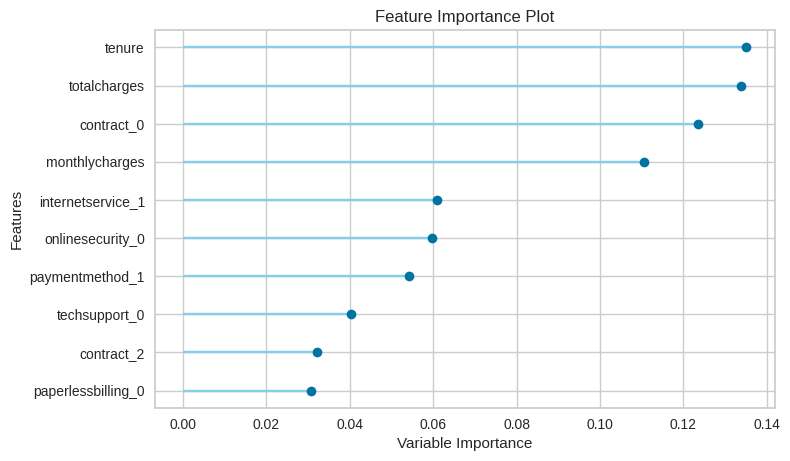

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [ ]:
catb = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8051,0.8404,0.7173,0.7959,0.7982,0.4623,0.4664
1,0.8228,0.8651,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8294,0.7025,0.7826,0.7856,0.4293,0.4327
3,0.8299,0.8799,0.7406,0.8221,0.8217,0.5222,0.5307
4,0.8071,0.8514,0.7136,0.7970,0.7989,0.4594,0.4651
5,0.8249,0.8555,0.7479,0.8183,0.8201,0.5207,0.5235
6,0.8096,0.8649,0.7376,0.8047,0.8067,0.4893,0.4902
7,0.8020,0.8548,0.7165,0.7936,0.7962,0.4563,0.4592
8,0.8274,0.8660,0.7592,0.8227,0.8244,0.5354,0.5367
9,0.8198,0.8416,0.7508,0.8152,0.8170,0.5165,0.5175


In [ ]:
tuned_catb = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.8445,0.7290,0.8089,0.8101,0.4921,0.4981
1,0.8228,0.8693,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8402,0.7088,0.7844,0.7873,0.4368,0.4388
3,0.8376,0.8794,0.7552,0.8308,0.8308,0.5482,0.5549
4,0.8046,0.8464,0.7214,0.7967,0.7993,0.4651,0.4677
5,0.8274,0.8530,0.7496,0.8207,0.8224,0.5260,0.5293
6,0.8122,0.8697,0.7266,0.8037,0.8059,0.4807,0.4846
7,0.8274,0.8569,0.7592,0.8227,0.8244,0.5354,0.5367
8,0.8299,0.8621,0.7481,0.8227,0.8239,0.5283,0.5330
9,0.7995,0.8398,0.7244,0.7942,0.7964,0.4620,0.4629


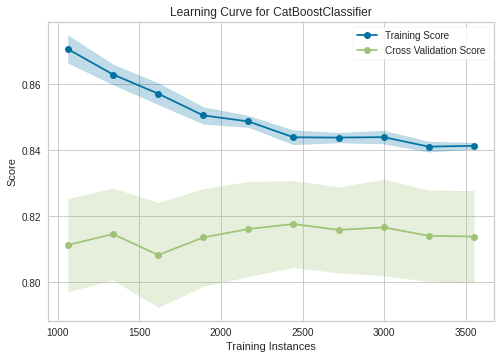

In [ ]:
plot_model(estimator = tuned_catb, plot = 'learning')

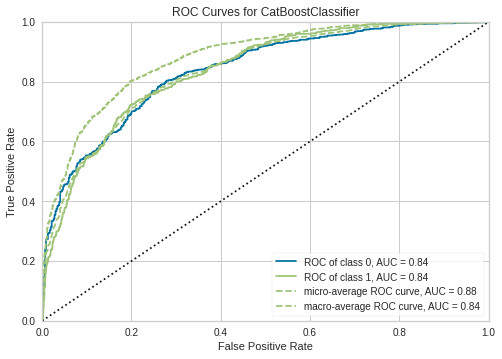

In [ ]:
plot_model(estimator = tuned_catb, plot = 'auc')

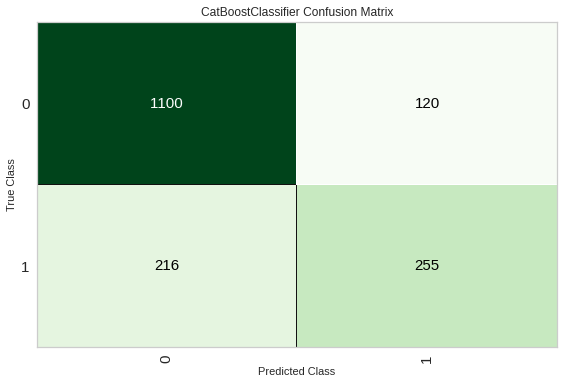

In [ ]:
plot_model(estimator = tuned_catb, plot = 'confusion_matrix')

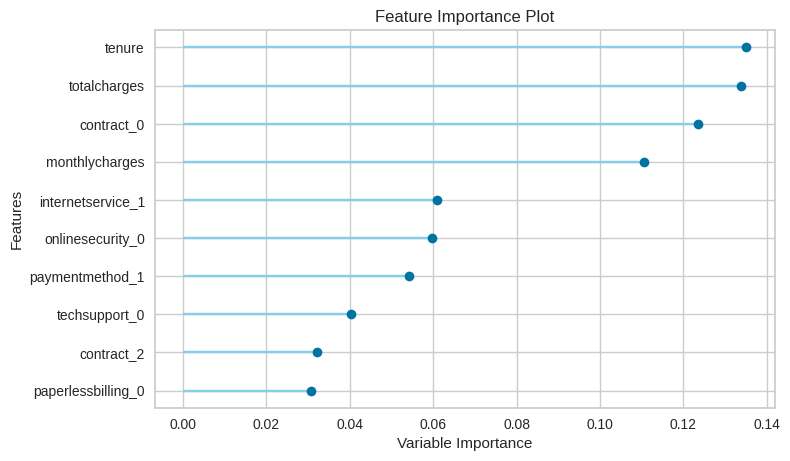

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')